# Proyecto 3

In [1]:
# Librerías
# Para leer/guardar archivos en formato pickle
import pickle

# Para el cálculo numérico y el análisis de datos
import numpy as np

# Para el manejo y análisis de estructuras de datos
import pandas as pd

# Para visualizar todas las columnas
pd.options.display.max_columns = None

# Para visualizar todas las filas
#pd.options.display.max_rows = None

# Para crear tablas resumen de los conjuntos de datos
import sidetable

# Para la creación de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Para manejar fechas
from datetime import datetime

# Para generar calendarios, por defecto tienen el lunes como el primer día de la semana 
# y el domingo como el último
import calendar

# Para evitar los warnings
import warnings
warnings.filterwarnings('ignore')

## EDA

In [5]:
# Leer el archivo
df = pd.read_csv("datos/bikes.csv", index_col=0)

In [6]:
# Mostrar la cabecera
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Convertir una columna a índice
df.set_index(["instant"], inplace=True)

In [8]:
# Mostrar los últimos registros
df.tail()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,30-12-2019,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
730,31-12-2019,spring,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [9]:
# Tamaño del dataframe, (filas, columnas)
df.shape

(730, 15)

In [10]:
# Nombre de las columnas del dataframe
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [11]:
# Tipos de datos de cada una de las columnas del dataframe
df.dtypes

dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [12]:
# Información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 91.2+ KB


In [13]:
# Principales estadísticos de las columnas numéricas del dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021


In [14]:
# Principales estadísticos de las columnas categóricas del dataframe
df.describe(include="object").T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


In [15]:
# Valores nulos del dataframe
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
# Tabla de porcentaje de nulos
df.stb.missing()

,missing,total,percent
dteday,0,730,0.0
season,0,730,0.0
yr,0,730,0.0
mnth,0,730,0.0
holiday,0,730,0.0
weekday,0,730,0.0
workingday,0,730,0.0
weathersit,0,730,0.0
temp,0,730,0.0
atemp,0,730,0.0


In [17]:
# Valores duplicados del dataframe
df.duplicated().sum()

0

In [18]:
# Nuevo dataframe sólo con las columnas numéricas
df_numericas = df.select_dtypes(include=np.number)
df_numericas.sample()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,
520,1,6,0,1,1,1,24.4975,28.91415,48.7083,19.083811,1071,5927,6998


In [19]:
# Nuevo dataframe sólo con las columnas categóricas
df_categoricas = df.select_dtypes(include="object")
df_categoricas.sample()

,dteday,season
instant,,
220,08-08-2018,autumn


In [20]:
# Crear un dataframe con los valores únicos de cada variable
valores_unicos = {col:df[col].unique().tolist() for col in df.columns}
df_valores_unicos = pd.DataFrame(columns=["variable", "valores_unicos"])
df_valores_unicos["variable"] = valores_unicos.keys()
df_valores_unicos["valores_unicos"] = valores_unicos.values()

In [21]:
df_valores_unicos

,variable,valores_unicos
0,dteday,"[01-01-2018, 02-01-2018, 03-01-2018, 04-01-201..."
1,season,"[spring, summer, autumn, winter]"
2,yr,"[0, 1]"
3,mnth,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
4,holiday,"[0, 1]"
5,weekday,"[6, 0, 1, 2, 3, 4, 5]"
6,workingday,"[0, 1]"
7,weathersit,"[2, 1, 3]"
8,temp,"[14.110847, 14.902598, 8.050924, 8.2, 9.305237..."
9,atemp,"[18.18125, 17.68695, 9.47025, 10.6061, 11.4635..."


In [22]:
# Frecuencia de cada una de las columnas del dataframe
for columna in df.columns:
    print(f"En la columna '{columna}' tenemos los valores: ")
    print(df[columna].value_counts())

En la columna 'dteday' tenemos los valores: 
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64
En la columna 'season' tenemos los valores: 
autumn    188
summer    184
spring    180
winter    178
Name: season, dtype: int64
En la columna 'yr' tenemos los valores: 
0    365
1    365
Name: yr, dtype: int64
En la columna 'mnth' tenemos los valores: 
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
En la columna 'holiday' tenemos los valores: 
0    709
1     21
Name: holiday, dtype: int64
En la columna 'weekday' tenemos los valores: 
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
En la columna 'workingday' tenemos los valores: 
1    499
0    231
Name: workingday, dtype: int64
En la columna 'weathersit'

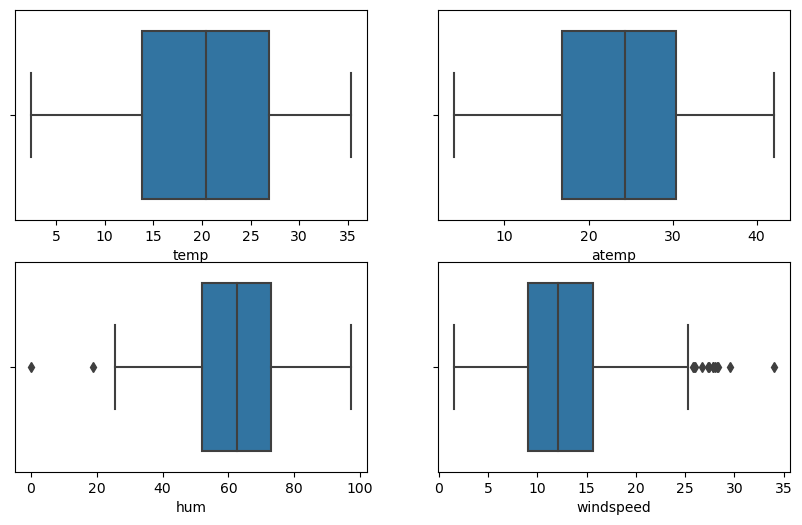

In [23]:
# Representación gráfica de outliers

# Gráfica para las 4 columnas
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,6))

# Aplanar figuras
axes = axes.flat

lista_col_numericas = ['temp', 'atemp', 'hum', 'windspeed']

for i, columna in enumerate(lista_col_numericas):
    sns.boxplot(data=df_numericas, x=columna, ax=axes[i])

# Mostrar la figura
plt.show()

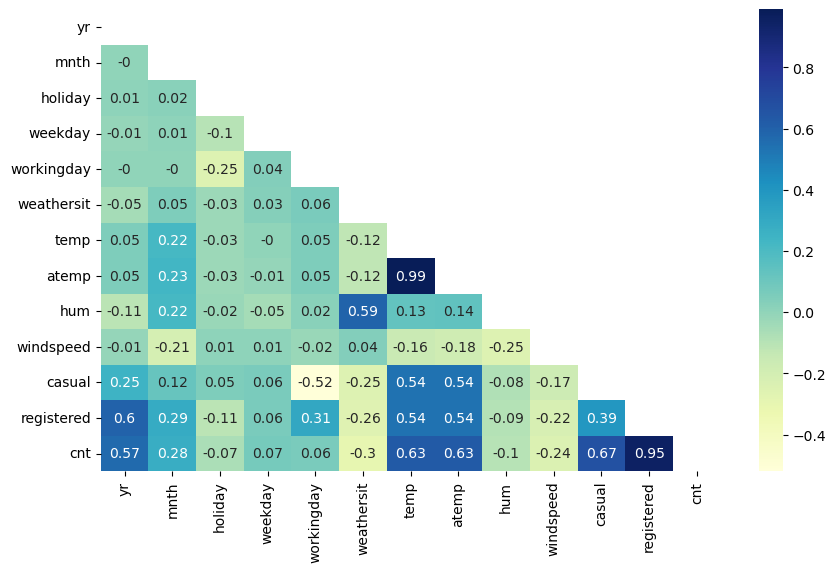

In [24]:
# Representación gráfica de la matriz de correlación

# Crear una máscara para sólo mostrar de la diagonal hacia abajo
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(10,6))
sns.heatmap(round(df.corr(), 2), mask=mask, cmap="YlGnBu", annot=True);
plt.show()

## Limpieza

### Detección y sustitución de outliers

In [25]:
# Función para detectar outliers
def detectar_outliers(lista_columnas, dataframe):
    # Diccionario donde almacenar los índices de los outliers
    dicc_indices = {}
    # Iterar por la lista de las columnas numéricas del dataframe
    for col in lista_columnas:
        # Calcular los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        # Calcular el rango intercuartilico
        IQR = Q3 - Q1
        # Para calcular el limite
        outlier_step = 1.5 * IQR
        # Filtrar el dataframe para identificar los outliers
        df_outliers = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        # Si el DataFrame de outliers tiene algún registro
        if df_outliers.shape[0] > 0:
            #insertamos en el diccionario la columna y los índices outliers
            dicc_indices[col] = list(df_outliers.index)
    return dicc_indices

In [26]:
# Aplicar la función para obtener el diccionario de los outliers.
dicc_indices_outliers = detectar_outliers(lista_col_numericas, df)
dicc_indices_outliers

{'hum': [50, 69],
 'windspeed': [45, 50, 94, 95, 293, 383, 408, 421, 432, 433, 450, 666, 721]}

In [27]:
# Hacemos una copia del dataframe para sustituir los outliers
dfcopia = df.copy()
dfcopia.sample()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
424,28-02-2019,spring,1,2,0,2,1,1,14.725847,17.67625,39.5833,12.958939,229,4134,4363


In [28]:
# Sustituimos el valor outlier por el valor de la mediana 
# Iterar por el diccionario que nos devuelve la función
for k, v in dicc_indices_outliers.items():
    # Calcular la media de la columna del diccionario en el dataframe
    mediana = dfcopia[k].median()
    # Iterar por los indices de la lista de valores de cada columna
    for i in v:
        # Utilizando loc, reemplazamos los valores de los outliers
        dfcopia.loc[i,k] = mediana

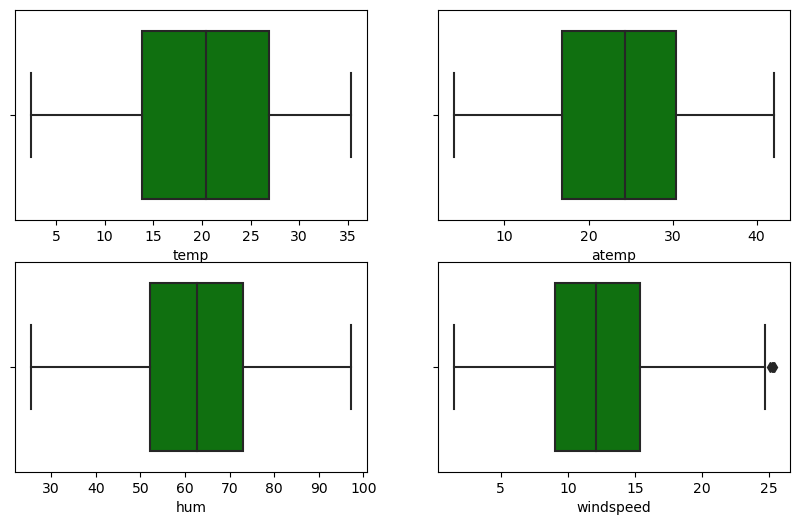

In [29]:
# Representación gráfica sin outliers

# Gráfica para las 4 columnas
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,6))

# Aplanar figuras
axes = axes.flat

for i, columna in enumerate(lista_col_numericas):
    sns.boxplot(data=dfcopia, x=columna, ax=axes[i], color="green")

# Mostrar la figura
plt.show()

Ya solo nos quedan outliers en la columna windspeed.

### Cambio a tipo datatime columna dteday

In [30]:
# Cambio del tipo de columna
dfcopia["dteday"] = pd.to_datetime(dfcopia["dteday"], dayfirst=True)

In [31]:
dfcopia.dtypes

dteday        datetime64[ns]
season                object
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### Creación columna 'weekday' correcta

In [32]:
dfcopia.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-01-04,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-01-05,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Función para crear el día de la semana correcto, codificado de la siguiente forma:
- 0 es monday/lunes
- 1 es tuesday/martes
- 2 es wednesday/miércoles
- 3 es thursday/jueves
- 4 es friday/viernes
- 5 es saturday/sábado
- 6 es sunday/domingo

In [33]:
def dia_semana_num(dia):
    # Función para obtener el número de día, según la fecha 
    # Codificado 0-monday, 1-tuesday, 2-wednesday, 3-thursday, 4-friday, 5-saturday, 6-sunday
    return dia.weekday()

In [34]:
# La columna weekday tiene unos valores incorrectos
# Aplicar la función
dfcopia.insert(6, "weekday_ok", dfcopia["dteday"].apply(dia_semana_num))

In [35]:
# Para comprobar que tiene los valores adecuados
dfcopia["weekday_ok"].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [36]:
# Eliminar la columna errónea
dfcopia.drop(["weekday"], axis=1, inplace=True)

In [37]:
dfcopia.head()

,dteday,season,yr,mnth,holiday,weekday_ok,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,spring,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,spring,0,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,spring,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-01-04,spring,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-01-05,spring,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [38]:
# Con una tabla de contingencia se verifica que se han modidificado correctamente los días de la semana
pd.crosstab(dfcopia["weekday_ok"], dfcopia["dteday"], margins=True)

dteday,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,2018-01-10 00:00:00,2018-01-11 00:00:00,2018-01-12 00:00:00,2018-01-13 00:00:00,2018-01-14 00:00:00,2018-01-15 00:00:00,2018-01-16 00:00:00,2018-01-17 00:00:00,2018-01-18 00:00:00,2018-01-19 00:00:00,2018-01-20 00:00:00,2018-01-21 00:00:00,2018-01-22 00:00:00,2018-01-23 00:00:00,2018-01-24 00:00:00,2018-01-25 00:00:00,2018-01-26 00:00:00,2018-01-27 00:00:00,2018-01-28 00:00:00,2018-01-29 00:00:00,2018-01-30 00:00:00,2018-01-31 00:00:00,2018-02-01 00:00:00,2018-02-02 00:00:00,2018-02-03 00:00:00,2018-02-04 00:00:00,2018-02-05 00:00:00,2018-02-06 00:00:00,2018-02-07 00:00:00,2018-02-08 00:00:00,2018-02-09 00:00:00,2018-02-10 00:00:00,2018-02-11 00:00:00,2018-02-12 00:00:00,2018-02-13 00:00:00,2018-02-14 00:00:00,2018-02-15 00:00:00,2018-02-16 00:00:00,2018-02-17 00:00:00,2018-02-18 00:00:00,2018-02-19 00:00:00,2018-02-20 00:00:00,2018-02-21 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00,2018-02-24 00:00:00,2018-02-25 00:00:00,2018-02-26 00:00:00,2018-02-27 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00,2018-03-02 00:00:00,2018-03-03 00:00:00,2018-03-04 00:00:00,2018-03-05 00:00:00,2018-03-06 00:00:00,2018-03-07 00:00:00,2018-03-08 00:00:00,2018-03-09 00:00:00,2018-03-10 00:00:00,2018-03-11 00:00:00,2018-03-12 00:00:00,2018-03-13 00:00:00,2018-03-14 00:00:00,2018-03-15 00:00:00,2018-03-16 00:00:00,2018-03-17 00:00:00,2018-03-18 00:00:00,2018-03-19 00:00:00,2018-03-20 00:00:00,2018-03-21 00:00:00,2018-03-22 00:00:00,2018-03-23 00:00:00,2018-03-24 00:00:00,2018-03-25 00:00:00,2018-03-26 00:00:00,2018-03-27 00:00:00,2018-03-28 00:00:00,2018-03-29 00:00:00,2018-03-30 00:00:00,2018-03-31 00:00:00,2018-04-01 00:00:00,2018-04-02 00:00:00,2018-04-03 00:00:00,2018-04-04 00:00:00,2018-04-05 00:00:00,2018-04-06 00:00:00,2018-04-07 00:00:00,2018-04-08 00:00:00,2018-04-09 00:00:00,2018-04-10 00:00:00,2018-04-11 00:00:00,2018-04-12 00:00:00,2018-04-13 00:00:00,2018-04-14 00:00:00,2018-04-15 00:00:00,2018-04-16 00:00:00,2018-04-17 00:00:00,2018-04-18 00:00:00,2018-04-19 00:00:00,2018-04-20 00:00:00,2018-04-21 00:00:00,2018-04-22 00:00:00,2018-04-23 00:00:00,2018-04-24 00:00:00,2018-04-25 00:00:00,2018-04-26 00:00:00,2018-04-27 00:00:00,2018-04-28 00:00:00,2018-04-29 00:00:00,2018-04-30 00:00:00,2018-05-01 00:00:00,2018-05-02 00:00:00,2018-05-03 00:00:00,2018-05-04 00:00:00,2018-05-05 00:00:00,2018-05-06 00:00:00,2018-05-07 00:00:00,2018-05-08 00:00:00,2018-05-09 00:00:00,2018-05-10 00:00:00,2018-05-11 00:00:00,2018-05-12 00:00:00,2018-05-13 00:00:00,2018-05-14 00:00:00,2018-05-15 00:00:00,2018-05-16 00:00:00,2018-05-17 00:00:00,2018-05-18 00:00:00,2018-05-19 00:00:00,2018-05-20 00:00:00,2018-05-21 00:00:00,2018-05-22 00:00:00,2018-05-23 00:00:00,2018-05-24 00:00:00,2018-05-25 00:00:00,2018-05-26 00:00:00,2018-05-27 00:00:00,2018-05-28 00:00:00,2018-05-29 00:00:00,2018-05-30 00:00:00,2018-05-31 00:00:00,2018-06-01 00:00:00,2018-06-02 00:00:00,2018-06-03 00:00:00,2018-06-04 00:00:00,2018-06-05 00:00:00,2018-06-06 00:00:00,2018-06-07 00:00:00,2018-06-08 00:00:00,2018-06-09 00:00:00,2018-06-10 00:00:00,2018-06-11 00:00:00,2018-06-12 00:00:00,2018-06-13 00:00:00,2018-06-14 00:00:00,2018-06-15 00:00:00,2018-06-16 00:00:00,2018-06-17 00:00:00,2018-06-18 00:00:00,2018-06-19 00:00:00,2018-06-20 00:00:00,2018-06-21 00:00:00,2018-06-22 00:00:00,2018-06-23 00:00:00,2018-06-24 00:00:00,2018-06-25 00:00:00,2018-06-26 00:00:00,2018-06-27 00:00:00,2018-06-28 00:00:00,2018-06-29 00:00:00,2018-06-30 00:00:00,2018-07-01 00:00:00,2018-07-02 00:00:00,2018-07-03 00:00:00,2018-07-04 00:00:00,2018-07-05 00:00:00,2018-07-06 00:00:00,2018-07-07 00:00:00,2018-07-08 00:00:00,2018-07-09 00:00:00,2018-07-10 00:00:00,2018-07-11 00:00:00,2018-07-12 00:00:00,2018-07-13 00:00:00,2018-07-14 00:00:00,2018-07-15 00:00:00,2018-07-16 00:00:00,2018-07-17 00:00:00,2018-07-18 00:00:00,2018-07-19 00

### Creación columna 'season' correcta

In [39]:
# Se observa que las estaciones del año no corresponden a los meses del año que le pasamos de entrada
pd.crosstab(dfcopia["season"], dfcopia["mnth"], margins=True)

mnth,1,2,3,4,5,6,7,8,9,10,11,12,All
season,,,,,,,,,,,,,
autumn,0,0,0,0,0,20,62,62,44,0,0,0,188
spring,62,56,40,0,0,0,0,0,0,0,0,22,180
summer,0,0,22,60,62,40,0,0,0,0,0,0,184
winter,0,0,0,0,0,0,0,0,16,62,60,40,178
All,62,56,62,60,62,60,62,62,60,62,60,62,730


Función para establecer el rango de los días de cada una de las estaciones independientemente del año que le pasemos de entrada
- Del 21-03 al 20-06 es primavera/spring
- Del 21-06 al 22-09 es verano/summer
- Del 23-09 al 20-12 es otoño/autumn
- Del 21-12 al 20-03 es invierno/winter

In [40]:
def establecer_estacion(dia):
    # Función para establecer el rango de los días de cada una de las estaciones independientemente del año
    # Del 21-03 al 20-06 es primavera, del 21-06 al 22-09 es verano, del 23-09 al 20-12 es otoño y del 21-12 al 20-03 es invierno
    
    # Obtener solo el año de la fecha pasada en la función
    año = str(dia.year)
    # Definir un diccionario con el rango de fechas de las estaciones
    estacion = {"spring": pd.date_range(start="21/03/"+año, end="20/06/"+año),
                "summer": pd.date_range(start="21/06/"+año, end="22/09/"+año),
                "autumn": pd.date_range(start="23/09/"+año, end="20/12/"+año),
                "winter": pd.date_range(start="21/12/"+año, end="20/03/"+año)}
    if dia in estacion["spring"]:
        return "spring"
    elif dia in estacion["summer"]:
        return "summer"
    elif dia in estacion["autumn"]:
        return "autumn"
    else:
        return "winter"

In [41]:
# Aplicar la función para tener las fechas correctas de las estaciones
dfcopia.insert(2, "season_ok", dfcopia['dteday'].map(establecer_estacion))

In [42]:
# Para comprobar que tiene los valores adecuados
dfcopia["season_ok"].unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

In [43]:
# Eliminar la columna errónea
dfcopia.drop(["season"], axis=1, inplace=True)

In [44]:
dfcopia.head()

,dteday,season_ok,yr,mnth,holiday,weekday_ok,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,winter,0,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,winter,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-01-04,winter,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-01-05,winter,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [45]:
# Con una tabla de contingencia se verifica que se han modidificado correctamente las estaciones
pd.crosstab(dfcopia["season_ok"], dfcopia["mnth"], margins=True)

mnth,1,2,3,4,5,6,7,8,9,10,11,12,All
season_ok,,,,,,,,,,,,,
autumn,0,0,0,0,0,0,0,0,16,62,60,40,178
spring,0,0,22,60,62,40,0,0,0,0,0,0,184
summer,0,0,0,0,0,20,62,62,44,0,0,0,188
winter,62,56,40,0,0,0,0,0,0,0,0,22,180
All,62,56,62,60,62,60,62,62,60,62,60,62,730


### Creación columna 'workingday' correcta

In [46]:
dfcopia.head()

,dteday,season_ok,yr,mnth,holiday,weekday_ok,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,winter,0,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,winter,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-01-04,winter,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-01-05,winter,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Función para que el valor de la columna 'workingday' sea 1 si el día no es fin de semana ni festivo, de lo contrario es 0.

Para los valores de sábado, domingo y festivo --> 0, resto --> 1

In [47]:
def crear_workingday_num(dia):
    # Función que devuelve 0 si es sábado, domingo o festivo. 1 en lo contrario
    
    # Diccionario de festivos
    festivos = {
        '01-01': 'New Years Day', 
        '16-01': 'Martin Luther Kings Birthday', 
        '13-02': 'Lincolns Birthday', 
        '20-02': 'Presidents Day', 
        '31-03': 'Cesar Chavez Birthday', 
        '29-05': 'Memorial Day', 
        '04-07': 'Independence Day', 
        '05-07': 'Bloody Thursday', 
        '28-07': 'Harry Bridges Birthday', 
        '04-09': 'Labor Day', 
        '10-11': 'Veterans Day', 
        '23-11': 'Thanksgiving Day', 
        '24-11': 'Day After Thanksgiving', 
        '24-12': 'Christmas Eve', 
        '25-12': 'Christmas Day', 
        '31-12': 'New Years Eve'}
    
    if (dia.weekday() == 5) or (dia.weekday() == 6):
        # Si es fin de semana
        return 0
    else:
        # Si es festivo
        dia_festivo = datetime.strftime(dia, '%d-%m')
        if dia_festivo in festivos.keys():
            return 0
        else:
            # Si es día laborable
            return 1

In [48]:
# Aplicar la función para tener los días laborables correctos
dfcopia.insert(7, "workingday_ok", dfcopia["dteday"].apply(crear_workingday_num))

In [49]:
# Eliminar la columna errónea
dfcopia.drop(["workingday"], axis=1, inplace=True)

In [50]:
dfcopia.head()

,dteday,season_ok,yr,mnth,holiday,weekday_ok,workingday_ok,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,winter,0,1,0,1,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,winter,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-01-04,winter,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-01-05,winter,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [51]:
# Con una tabla de contingencia se verifica que se ha modidificado correctamente los días laborables
pd.crosstab(dfcopia["workingday_ok"], dfcopia["dteday"], margins=True)

dteday,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,2018-01-10 00:00:00,2018-01-11 00:00:00,2018-01-12 00:00:00,2018-01-13 00:00:00,2018-01-14 00:00:00,2018-01-15 00:00:00,2018-01-16 00:00:00,2018-01-17 00:00:00,2018-01-18 00:00:00,2018-01-19 00:00:00,2018-01-20 00:00:00,2018-01-21 00:00:00,2018-01-22 00:00:00,2018-01-23 00:00:00,2018-01-24 00:00:00,2018-01-25 00:00:00,2018-01-26 00:00:00,2018-01-27 00:00:00,2018-01-28 00:00:00,2018-01-29 00:00:00,2018-01-30 00:00:00,2018-01-31 00:00:00,2018-02-01 00:00:00,2018-02-02 00:00:00,2018-02-03 00:00:00,2018-02-04 00:00:00,2018-02-05 00:00:00,2018-02-06 00:00:00,2018-02-07 00:00:00,2018-02-08 00:00:00,2018-02-09 00:00:00,2018-02-10 00:00:00,2018-02-11 00:00:00,2018-02-12 00:00:00,2018-02-13 00:00:00,2018-02-14 00:00:00,2018-02-15 00:00:00,2018-02-16 00:00:00,2018-02-17 00:00:00,2018-02-18 00:00:00,2018-02-19 00:00:00,2018-02-20 00:00:00,2018-02-21 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00,2018-02-24 00:00:00,2018-02-25 00:00:00,2018-02-26 00:00:00,2018-02-27 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00,2018-03-02 00:00:00,2018-03-03 00:00:00,2018-03-04 00:00:00,2018-03-05 00:00:00,2018-03-06 00:00:00,2018-03-07 00:00:00,2018-03-08 00:00:00,2018-03-09 00:00:00,2018-03-10 00:00:00,2018-03-11 00:00:00,2018-03-12 00:00:00,2018-03-13 00:00:00,2018-03-14 00:00:00,2018-03-15 00:00:00,2018-03-16 00:00:00,2018-03-17 00:00:00,2018-03-18 00:00:00,2018-03-19 00:00:00,2018-03-20 00:00:00,2018-03-21 00:00:00,2018-03-22 00:00:00,2018-03-23 00:00:00,2018-03-24 00:00:00,2018-03-25 00:00:00,2018-03-26 00:00:00,2018-03-27 00:00:00,2018-03-28 00:00:00,2018-03-29 00:00:00,2018-03-30 00:00:00,2018-03-31 00:00:00,2018-04-01 00:00:00,2018-04-02 00:00:00,2018-04-03 00:00:00,2018-04-04 00:00:00,2018-04-05 00:00:00,2018-04-06 00:00:00,2018-04-07 00:00:00,2018-04-08 00:00:00,2018-04-09 00:00:00,2018-04-10 00:00:00,2018-04-11 00:00:00,2018-04-12 00:00:00,2018-04-13 00:00:00,2018-04-14 00:00:00,2018-04-15 00:00:00,2018-04-16 00:00:00,2018-04-17 00:00:00,2018-04-18 00:00:00,2018-04-19 00:00:00,2018-04-20 00:00:00,2018-04-21 00:00:00,2018-04-22 00:00:00,2018-04-23 00:00:00,2018-04-24 00:00:00,2018-04-25 00:00:00,2018-04-26 00:00:00,2018-04-27 00:00:00,2018-04-28 00:00:00,2018-04-29 00:00:00,2018-04-30 00:00:00,2018-05-01 00:00:00,2018-05-02 00:00:00,2018-05-03 00:00:00,2018-05-04 00:00:00,2018-05-05 00:00:00,2018-05-06 00:00:00,2018-05-07 00:00:00,2018-05-08 00:00:00,2018-05-09 00:00:00,2018-05-10 00:00:00,2018-05-11 00:00:00,2018-05-12 00:00:00,2018-05-13 00:00:00,2018-05-14 00:00:00,2018-05-15 00:00:00,2018-05-16 00:00:00,2018-05-17 00:00:00,2018-05-18 00:00:00,2018-05-19 00:00:00,2018-05-20 00:00:00,2018-05-21 00:00:00,2018-05-22 00:00:00,2018-05-23 00:00:00,2018-05-24 00:00:00,2018-05-25 00:00:00,2018-05-26 00:00:00,2018-05-27 00:00:00,2018-05-28 00:00:00,2018-05-29 00:00:00,2018-05-30 00:00:00,2018-05-31 00:00:00,2018-06-01 00:00:00,2018-06-02 00:00:00,2018-06-03 00:00:00,2018-06-04 00:00:00,2018-06-05 00:00:00,2018-06-06 00:00:00,2018-06-07 00:00:00,2018-06-08 00:00:00,2018-06-09 00:00:00,2018-06-10 00:00:00,2018-06-11 00:00:00,2018-06-12 00:00:00,2018-06-13 00:00:00,2018-06-14 00:00:00,2018-06-15 00:00:00,2018-06-16 00:00:00,2018-06-17 00:00:00,2018-06-18 00:00:00,2018-06-19 00:00:00,2018-06-20 00:00:00,2018-06-21 00:00:00,2018-06-22 00:00:00,2018-06-23 00:00:00,2018-06-24 00:00:00,2018-06-25 00:00:00,2018-06-26 00:00:00,2018-06-27 00:00:00,2018-06-28 00:00:00,2018-06-29 00:00:00,2018-06-30 00:00:00,2018-07-01 00:00:00,2018-07-02 00:00:00,2018-07-03 00:00:00,2018-07-04 00:00:00,2018-07-05 00:00:00,2018-07-06 00:00:00,2018-07-07 00:00:00,2018-07-08 00:00:00,2018-07-09 00:00:00,2018-07-10 00:00:00,2018-07-11 00:00:00,2018-07-12 00:00:00,2018-07-13 00:00:00,2018-07-14 00:00:00,2018-07-15 00:00:00,2018-07-16 00:00:00,2018-07-17 00:00:00,2018-07-18 00:00:00,2018-07-19 00

### Creación columna 'holiday' correcta

Función para que el valor de la columna 'holiday' sea 1 si el día es fin de semana y festivo, de lo contrario es 0.

Para los valores de sábado, domingo y festivo --> 1, resto --> 0

In [52]:
def crear_holiday_num(dia):
    # Función que devuelve 0 si es festivo. 1 en lo contrario
    
    # Diccionario de festivos
    festivos = {
        '01-01': 'New Years Day', 
        '16-01': 'Martin Luther Kings Birthday', 
        '13-02': 'Lincolns Birthday', 
        '20-02': 'Presidents Day', 
        '31-03': 'Cesar Chavez Birthday', 
        '29-05': 'Memorial Day', 
        '04-07': 'Independence Day', 
        '05-07': 'Bloody Thursday', 
        '28-07': 'Harry Bridges Birthday', 
        '04-09': 'Labor Day', 
        '10-11': 'Veterans Day', 
        '23-11': 'Thanksgiving Day', 
        '24-11': 'Day After Thanksgiving', 
        '24-12': 'Christmas Eve', 
        '25-12': 'Christmas Day', 
        '31-12': 'New Years Eve'}
    
    dia_festivo = datetime.strftime(dia, '%d-%m')
    if dia_festivo in festivos.keys():
        # Si es festivo
        return 1
    else:
        # Si es cualquier otro día
        return 0

In [53]:
# Aplicar la función para tener los días festivos correctos
dfcopia.insert(5, "holiday_ok", dfcopia["dteday"].apply(crear_holiday_num))

In [54]:
# Eliminar la columna errónea
dfcopia.drop(["holiday"], axis=1, inplace=True)

In [55]:
dfcopia.head()

,dteday,season_ok,yr,mnth,holiday_ok,weekday_ok,workingday_ok,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,winter,0,1,0,1,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,winter,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-01-04,winter,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-01-05,winter,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [56]:
# Con una tabla de contingencia se verifica que se ha modidificado correctamente los días festivos
pd.crosstab(dfcopia["holiday_ok"], dfcopia["dteday"], margins=True)

dteday,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,2018-01-10 00:00:00,2018-01-11 00:00:00,2018-01-12 00:00:00,2018-01-13 00:00:00,2018-01-14 00:00:00,2018-01-15 00:00:00,2018-01-16 00:00:00,2018-01-17 00:00:00,2018-01-18 00:00:00,2018-01-19 00:00:00,2018-01-20 00:00:00,2018-01-21 00:00:00,2018-01-22 00:00:00,2018-01-23 00:00:00,2018-01-24 00:00:00,2018-01-25 00:00:00,2018-01-26 00:00:00,2018-01-27 00:00:00,2018-01-28 00:00:00,2018-01-29 00:00:00,2018-01-30 00:00:00,2018-01-31 00:00:00,2018-02-01 00:00:00,2018-02-02 00:00:00,2018-02-03 00:00:00,2018-02-04 00:00:00,2018-02-05 00:00:00,2018-02-06 00:00:00,2018-02-07 00:00:00,2018-02-08 00:00:00,2018-02-09 00:00:00,2018-02-10 00:00:00,2018-02-11 00:00:00,2018-02-12 00:00:00,2018-02-13 00:00:00,2018-02-14 00:00:00,2018-02-15 00:00:00,2018-02-16 00:00:00,2018-02-17 00:00:00,2018-02-18 00:00:00,2018-02-19 00:00:00,2018-02-20 00:00:00,2018-02-21 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00,2018-02-24 00:00:00,2018-02-25 00:00:00,2018-02-26 00:00:00,2018-02-27 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00,2018-03-02 00:00:00,2018-03-03 00:00:00,2018-03-04 00:00:00,2018-03-05 00:00:00,2018-03-06 00:00:00,2018-03-07 00:00:00,2018-03-08 00:00:00,2018-03-09 00:00:00,2018-03-10 00:00:00,2018-03-11 00:00:00,2018-03-12 00:00:00,2018-03-13 00:00:00,2018-03-14 00:00:00,2018-03-15 00:00:00,2018-03-16 00:00:00,2018-03-17 00:00:00,2018-03-18 00:00:00,2018-03-19 00:00:00,2018-03-20 00:00:00,2018-03-21 00:00:00,2018-03-22 00:00:00,2018-03-23 00:00:00,2018-03-24 00:00:00,2018-03-25 00:00:00,2018-03-26 00:00:00,2018-03-27 00:00:00,2018-03-28 00:00:00,2018-03-29 00:00:00,2018-03-30 00:00:00,2018-03-31 00:00:00,2018-04-01 00:00:00,2018-04-02 00:00:00,2018-04-03 00:00:00,2018-04-04 00:00:00,2018-04-05 00:00:00,2018-04-06 00:00:00,2018-04-07 00:00:00,2018-04-08 00:00:00,2018-04-09 00:00:00,2018-04-10 00:00:00,2018-04-11 00:00:00,2018-04-12 00:00:00,2018-04-13 00:00:00,2018-04-14 00:00:00,2018-04-15 00:00:00,2018-04-16 00:00:00,2018-04-17 00:00:00,2018-04-18 00:00:00,2018-04-19 00:00:00,2018-04-20 00:00:00,2018-04-21 00:00:00,2018-04-22 00:00:00,2018-04-23 00:00:00,2018-04-24 00:00:00,2018-04-25 00:00:00,2018-04-26 00:00:00,2018-04-27 00:00:00,2018-04-28 00:00:00,2018-04-29 00:00:00,2018-04-30 00:00:00,2018-05-01 00:00:00,2018-05-02 00:00:00,2018-05-03 00:00:00,2018-05-04 00:00:00,2018-05-05 00:00:00,2018-05-06 00:00:00,2018-05-07 00:00:00,2018-05-08 00:00:00,2018-05-09 00:00:00,2018-05-10 00:00:00,2018-05-11 00:00:00,2018-05-12 00:00:00,2018-05-13 00:00:00,2018-05-14 00:00:00,2018-05-15 00:00:00,2018-05-16 00:00:00,2018-05-17 00:00:00,2018-05-18 00:00:00,2018-05-19 00:00:00,2018-05-20 00:00:00,2018-05-21 00:00:00,2018-05-22 00:00:00,2018-05-23 00:00:00,2018-05-24 00:00:00,2018-05-25 00:00:00,2018-05-26 00:00:00,2018-05-27 00:00:00,2018-05-28 00:00:00,2018-05-29 00:00:00,2018-05-30 00:00:00,2018-05-31 00:00:00,2018-06-01 00:00:00,2018-06-02 00:00:00,2018-06-03 00:00:00,2018-06-04 00:00:00,2018-06-05 00:00:00,2018-06-06 00:00:00,2018-06-07 00:00:00,2018-06-08 00:00:00,2018-06-09 00:00:00,2018-06-10 00:00:00,2018-06-11 00:00:00,2018-06-12 00:00:00,2018-06-13 00:00:00,2018-06-14 00:00:00,2018-06-15 00:00:00,2018-06-16 00:00:00,2018-06-17 00:00:00,2018-06-18 00:00:00,2018-06-19 00:00:00,2018-06-20 00:00:00,2018-06-21 00:00:00,2018-06-22 00:00:00,2018-06-23 00:00:00,2018-06-24 00:00:00,2018-06-25 00:00:00,2018-06-26 00:00:00,2018-06-27 00:00:00,2018-06-28 00:00:00,2018-06-29 00:00:00,2018-06-30 00:00:00,2018-07-01 00:00:00,2018-07-02 00:00:00,2018-07-03 00:00:00,2018-07-04 00:00:00,2018-07-05 00:00:00,2018-07-06 00:00:00,2018-07-07 00:00:00,2018-07-08 00:00:00,2018-07-09 00:00:00,2018-07-10 00:00:00,2018-07-11 00:00:00,2018-07-12 00:00:00,2018-07-13 00:00:00,2018-07-14 00:00:00,2018-07-15 00:00:00,2018-07-16 00:00:00,2018-07-17 00:00:00,2018-07-18 00:00:00,2018-07-19 00

Convertimos a 'category' las columnas que tienen categoría

In [57]:
dfcopia.columns

Index(['dteday', 'season_ok', 'yr', 'mnth', 'holiday_ok', 'weekday_ok',
       'workingday_ok', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [58]:
lista_categoricas = ['season_ok', 'yr', 'mnth', 'holiday_ok', 'weekday_ok', 'workingday_ok', 'weathersit']

In [59]:
for col in lista_categoricas:
    dfcopia[col] = dfcopia[col].astype("category")

In [60]:
dfcopia.dtypes

dteday           datetime64[ns]
season_ok              category
yr                     category
mnth                   category
holiday_ok             category
weekday_ok             category
workingday_ok          category
weathersit             category
temp                    float64
atemp                   float64
hum                     float64
windspeed               float64
casual                    int64
registered                int64
cnt                       int64
dtype: object

In [61]:
# Renombrar el nombre de las columnas
columnas_nuevas = {'season_ok': 'season', 'holiday_ok':'holiday', 'weekday_ok':'weekday', 'workingday_ok': 'workingday'}
dfcopia.rename(columns=columnas_nuevas, inplace=True)
dfcopia.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [62]:
dfcopia.to_pickle("datos/1-bikes-eda.pkl")

### Analizar las relaciones entre las variables

Variable respuesta o dependiente: es cnt, que es la suma de casual y registered, que es el número de bicicletas que queremos predecir.

El número de bicicletas alquiladas al día varía según:

- Si es un festivo o no.

- Según las condiciones climatológicas (temperatura, viento).

- Si son usuarios registrados o no.